In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import collections as col
#Utilizando community detection de python-louvain
import community as com
# API de spotify
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="33eca6309d3344028987abab11e234bc",
                                                           client_secret="25f6177ad5db47b687266bfdd2e990e2"))
import collections

In [3]:
#import de los dos grafos
G_esp = nx.read_gexf("top200esp_updated.gexf")
G_global = nx.read_gexf("top200global_updated.gexf")

<AxesSubplot:xlabel='popularidad', ylabel='exito_medio'>

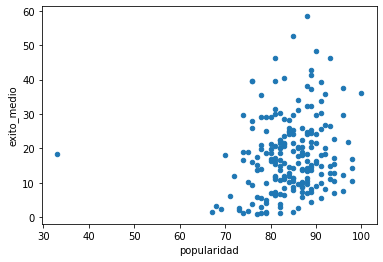

In [4]:
#cálculo del éxito medio a través del peso medio de nodos que superen el grado 2
#y cuyas colaboraciones son más de tres canciones distintas.

dic_media = {}
for i in G_global.nodes():
    suma = 0
    if G_global.degree(i) > 2:
        canciones = set()
        for j in G_global.edges(i, True):
            suma += j[2]['weight']
            canciones.add(j[2]['Song'])
        if len(canciones) > 3:
            dic_media[i] = suma/G_global.degree(i)
df_global = pd.DataFrame.from_dict(dic_media, "index")
df_global.sort_values(by=0, ascending=False)
result = []
for index, row in df_global.iterrows():
    result.append(G_global.nodes[index]["Popularity"])
df_global["popularity"] = result 
df_global.columns = ['exito_medio', 'popularidad']
%matplotlib inline
df_global.plot(kind='scatter', x="popularidad", y="exito_medio")

<AxesSubplot:xlabel='popularidad', ylabel='exito_medio'>

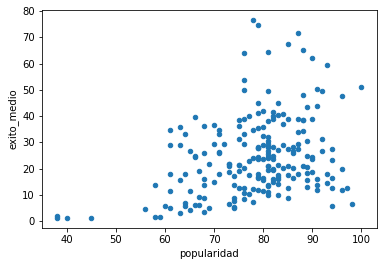

In [7]:
dic_media = {}
for i in G_esp.nodes():
    suma = 0
    if G_esp.degree(i) > 2:
        canciones = set()
        for j in G_esp.edges(i, True):
            suma += j[2]['weight']
            canciones.add(j[2]['Song'])
        if len(canciones) > 3:
            dic_media[i] = suma/G_esp.degree(i)
df_esp = pd.DataFrame.from_dict(dic_media, "index")
df_esp.sort_values(by=0, ascending=False)
result = []
for index, row in df_esp.iterrows():
    result.append(G_esp.nodes[index]["Popularity"])
df_esp["popularity"] = result 
df_esp.columns = ['exito_medio', 'popularidad']
%matplotlib inline
df_esp.plot(kind='scatter', x="popularidad", y="exito_medio")

In [8]:
df_global.sort_values(by="exito_medio", ascending=False)

,exito_medio,popularidad
Lenny Tavárez,58.380952,88
Dalex,52.681818,85
Sech,48.407407,90
Feid,46.214286,81
Ozuna,46.119048,93
...,...,...
Anderson .Paak,1.400000,79
Luciano,1.363636,78
Sfera Ebbasta,1.312500,82
Salmo,1.142857,74


In [10]:
df_global.sort_values(by="popularidad", ascending=False)

,exito_medio,popularidad
Bad Bunny,36.240000,100
Ariana Grande,10.538462,98
Juice WRLD,14.464286,98
Taylor Swift,17.000000,98
Drake,21.804348,97
...,...,...
Funk Wav,18.157895,70
"Royce Da 5'9""",2.428571,69
Juju,3.200000,68
KIDS SEE GHOSTS,1.500000,67


In [11]:
df_esp.sort_values(by="exito_medio", ascending=False)

,exito_medio,popularidad
Juanes,76.523810,78
Pablo Alborán,74.571429,79
Shakira,71.791667,87
Dalex,67.633333,85
Lenny Tavárez,65.285714,88
...,...,...
Miki Núñez,1.625000,58
Alba Reche,1.500000,59
Julia Medina,1.333333,45
Marta Sango,1.250000,38


In [12]:
df_esp.sort_values(by="popularidad", ascending=False)

,exito_medio,popularidad
Bad Bunny,50.951807,100
Ariana Grande,6.666667,98
Drake,12.500000,97
J Balvin,47.710843,96
Justin Bieber,19.681818,96
...,...,...
InnerCut,4.714286,56
Julia Medina,1.333333,45
María Escarmiento,1.200000,40
Carlos Right,2.000000,38


<AxesSubplot:ylabel='Frequency'>

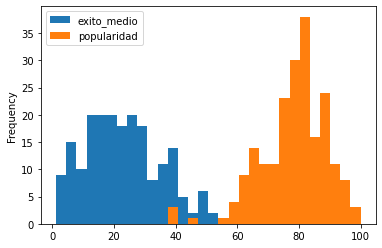

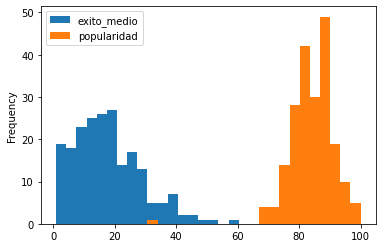

In [23]:
#histogramas donde aparecen el éxito medio y la popularidad, solo usamos los histogramas de éxito medio

%matplotlib inline
df_esp.plot.hist(by="exito_medio", bins = 30)
df_global.plot.hist(by="exito_medio", bins = 30)

In [24]:
#añadidos los datos del grado a un dataframe para después compararlos con la popularidad 

data_esp = pd.DataFrame.from_dict(dict(G_esp.nodes(data=True)), orient='index')
result = []
for index, row in data_esp.iterrows():
    result.append(G_esp.degree(index))
data_esp["Degree"] = result 

In [25]:
data_global = pd.DataFrame.from_dict(dict(G_global.nodes(data=True)), orient='index')
result = []
for index, row in data_global.iterrows():
    result.append(G_global.degree(index))
data_global["Degree"] = result 

<AxesSubplot:xlabel='Popularity', ylabel='Degree'>

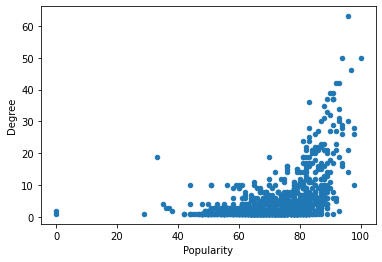

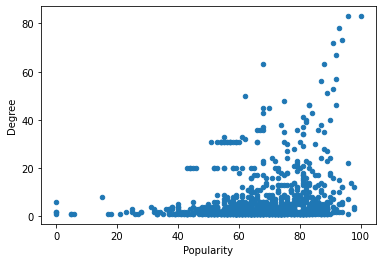

In [26]:
%matplotlib inline
data_global.plot(kind='scatter', x="Popularity", y="Degree")
data_esp.plot(kind='scatter', x="Popularity", y="Degree")